<a href="https://colab.research.google.com/github/ameyas1/Advance_Deployment_Models/blob/master/tf_serving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0-rc2


In [0]:
import os
import json
import tempfile
import requests

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
fc_model=load_model('/content/drive/My Drive/cp/adv_model_base_model_196-0.002.hdf5')

In [5]:
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

fc_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 632
drwxr-xr-x 2 root root   4096 Apr 15 02:35 assets
-rw-r--r-- 1 root root 635404 Apr 15 02:35 saved_model.pb
drwxr-xr-x 2 root root   4096 Apr 15 02:35 variables


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/blackpink_revised.zip', 'r')
zip_ref.extractall('test')
zip_ref.close()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1/255.)

validation_dir='test/test_vgg/'

validation_generator1 =  test_datagen.flow_from_directory( validation_dir,
                                                          color_mode='rgb',
                                                          batch_size  = 10,
                                                          class_mode  = 'categorical', 
                                                          classes=['lisa','rose','jisoo','jennie'],
                                                          target_size = (224, 224))

Found 612 images belonging to 4 classes.


In [0]:
list_i=[]
list_l=[]
for c in range(1):
  i,j = next(validation_generator1)
  list_i.append(i)
  list_l.append(j)

In [16]:
len(list_i)

1

In [49]:
for i in list_l[0]:
  print(i)

[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]


In [53]:
import numpy as np
list_labels=[]
for i in list_l[0]:
  k=np.argmax(i)
  list_labels.append(k)

list_labels[:5]

[1, 1, 3, 2, 0]

In [21]:
list_i[0][:3].shape

(3, 224, 224, 3)

In [29]:
list_i[0][3].shape

(224, 224, 3)

In [22]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['zero_padding2d_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 224, 224, 3)
        name: serving_default_zero_padding2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 4)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0415 02:40:51.478976 140544567183232 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/te

In [23]:

# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   7526      0 --:--:-- --:--:-- --:--:--  7507
OK
Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 htt

In [24]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 61 not upgraded.
Need to get 175 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.1.0 [175 MB]
Fetched 175 MB in 3s (60.4 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.1.0_all.deb ...
Unpacking tensorflow-model-server (2.1.0) ...
Setting up tensorflow-model-server (2.1.0) ...


In [0]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [26]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=blackpink_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [0]:

data = json.dumps({"signature_name": "serving_default", "instances": list_i[0][:6].tolist()})

In [0]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/blackpink_model:predict', data=data, headers=headers)

predictions = json.loads(json_response.text)['predictions']

In [38]:
predictions

[[3.56541605e-08, 0.999993086, 6.31999319e-06, 5.71854969e-07],
 [8.07317463e-07, 1.19496946e-07, 3.14884488e-07, 0.999998808],
 [1.28779917e-07, 0.999995232, 5.82241512e-07, 4.03501417e-06]]

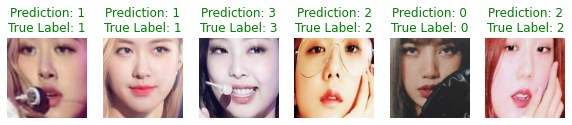

In [56]:
plt.figure(figsize=(10,15))

for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(list_i[0][i].reshape(224,224,3), cmap = plt.cm.binary)
    plt.axis('off')
    color = 'green' if np.argmax(predictions[i]) == list_labels[i] else 'red'
    plt.title('Prediction: {}\nTrue Label: {}'.format(np.argmax(predictions[i]), list_labels[i]), color=color)
    
plt.show()

1